In [1]:
from function import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard
label_map = {label:num for num, label in enumerate(actions)}
# print(label_map)
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [3]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
res = [.7, 0.2, 0.1]

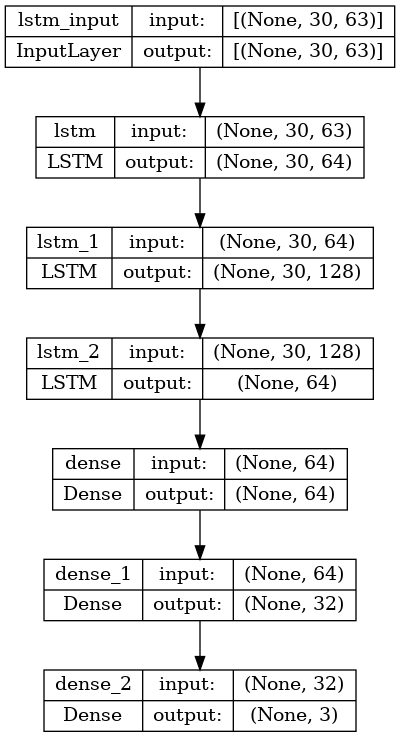

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [4]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])
model.summary()

Epoch 1/200
3/3 [==============================] - 3s 23ms/step - loss: 1.0948 - categorical_accuracy: 0.3176
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 1.0681 - categorical_accuracy: 0.7647
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 1.0087 - categorical_accuracy: 0.7294
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 0.8554 - categorical_accuracy: 0.7059
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.5523 - categorical_accuracy: 0.9176
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.8002 - categorical_accuracy: 0.6941
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 0.3809 - categorical_accuracy: 0.9412
Epoch 8/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2635 - categorical_accuracy: 0.9529
Epoch 9/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2905 - categorical_accuracy: 0.9529
Epoch 10/2

3/3 [==============================] - 0s 23ms/step - loss: 3.8848e-07 - categorical_accuracy: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 22ms/step - loss: 3.7586e-07 - categorical_accuracy: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 22ms/step - loss: 3.6183e-07 - categorical_accuracy: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 21ms/step - loss: 3.4220e-07 - categorical_accuracy: 1.0000
Epoch 150/200
3/3 [==============================] - 0s 22ms/step - loss: 3.2677e-07 - categorical_accuracy: 1.0000
Epoch 151/200
3/3 [==============================] - 0s 22ms/step - loss: 3.2116e-07 - categorical_accuracy: 1.0000
Epoch 152/200
3/3 [==============================] - 0s 21ms/step - loss: 3.0854e-07 - categorical_accuracy: 1.0000
Epoch 153/200
3/3 [==============================] - 0s 21ms/step - loss: 2.9171e-07 - categorical_accuracy: 1.0000
Epoch 154/200
3/3 [==============================] - 0s 22ms/step - loss: 2.8189e-07 -

In [5]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save('model.h5')